 # **Convolutional Neural Network (CNN)**
 - Nama : Muhamad Habibi Budiman
 - NIM  : 102022300226
 - CaAs : 2506


Import Libarry

In [1]:
import kagglehub
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import os
import tqdm
import random
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

## **Cats VS Dogs**

Download Dataset

In [2]:
#Download latest version
path = kagglehub.dataset_download("shaunthesheep/microsoft-catsvsdogs-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/microsoft-catsvsdogs-dataset


Membuat Dataframe Untuk Input Dan Output

In [3]:
input_path = []
label = []

# Direktori untuk Kucing dan Anjing (hardcoded)
cat_dir = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/"
dog_dir = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/"

In [4]:
# Mengumpulkan file dari folder Cat (label 1) tanpa pengecekan if/else
print(f"Mengumpulkan file dari '{cat_dir}'...")
for file_name in os.listdir(cat_dir):
    file_path = os.path.join(cat_dir, file_name)
    input_path.append(file_path)
    label.append(1) # 1 untuk Kucing

# Mengumpulkan file dari folder Dog (label 0) tanpa pengecekan if/else
print(f"Mengumpulkan file dari '{dog_dir}'...")
for file_name in os.listdir(dog_dir):
     file_path = os.path.join(dog_dir, file_name)
     input_path.append(file_path)
     label.append(0) # 0 untuk Anjing

Mengumpulkan file dari '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/'...
Mengumpulkan file dari '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/'...


In [5]:
# Membuat DataFrame
df = pd.DataFrame({'image_path': input_path,'label': label})

VIsualisasi Data

In [6]:
print("\nDistribusi Label:")
display(df['label'].value_counts())


Distribusi Label:


label
1    12501
0    12501
Name: count, dtype: int64

In [7]:
df.head(20000)

image_path  label
0      /kaggle/input/microsoft-catsvsdogs-dataset/Pet...      1
1      /kaggle/input/microsoft-catsvsdogs-dataset/Pet...      1
2      /kaggle/input/microsoft-catsvsdogs-dataset/Pet...      1
3      /kaggle/input/microsoft-catsvsdogs-dataset/Pet...      1
4      /kaggle/input/microsoft-catsvsdogs-dataset/Pet...      1
...                                                  ...    ...
19995  /kaggle/input/microsoft-catsvsdogs-dataset/Pet...      0
19996  /kaggle/input/microsoft-catsvsdogs-dataset/Pet...      0
19997  /kaggle/input/microsoft-catsvsdogs-dataset/Pet...      0
19998  /kaggle/input/microsoft-catsvsdogs-dataset/Pet...      0
19999  /kaggle/input/microsoft-catsvsdogs-dataset/Pet...      0

[20000 rows x 2 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25002 entries, 0 to 25001
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  25002 non-null  object
 1   label       25002 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [9]:
print("\nMissing Values:")
display(df.isnull().sum())


Missing Values:


image_path    0
label         0
dtype: int64

In [10]:
print ("Jumlah duplikasi data: ", df.duplicated().sum())

Jumlah duplikasi data:  0


Visualisasi gambar kucing

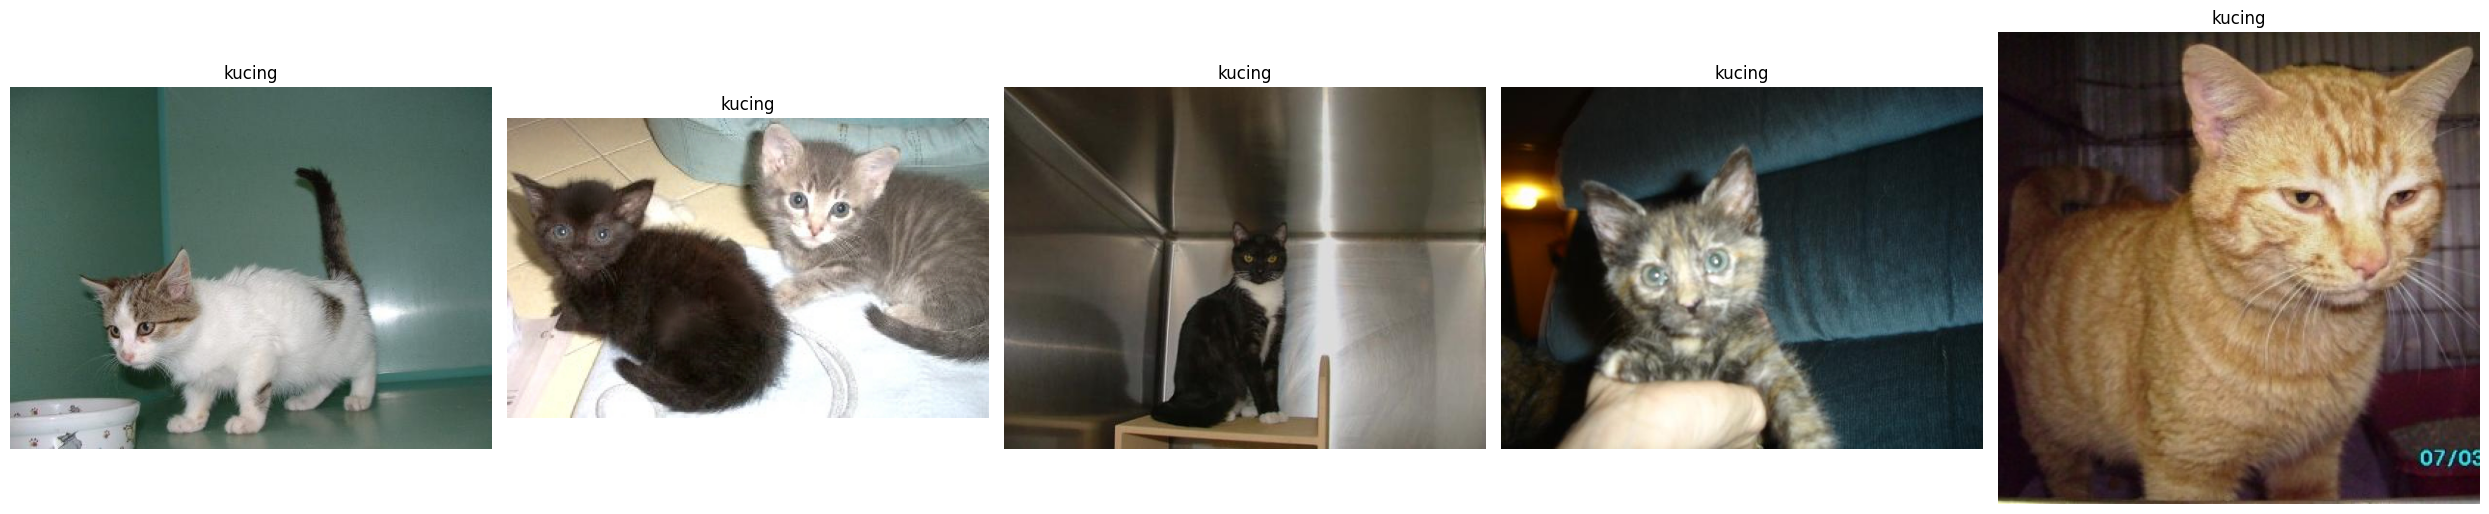

In [11]:
# Fungsi untuk memuat gambar (g
def load_img(file_path):
    return Image.open(file_path)


# Filter DataFrame untuk 'Kucing' dengan label 1
temp = df[df['label'] == 1]['image_path']

# Pilih indeks awal secara acak
start = random.randint(0, len(temp))

# Pilih 5 gambar dimulai dari indeks acak
files = temp[start:start + 5]

# Membuat figure besar untuk menampilkan grid gambar
plt.figure(figsize=(25, 25))

# Loop melalui gambar dan tampilkan dalam grid 5x5
for index, file in enumerate(files):
    plt.subplot(5, 5, index + 1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('kucing')
    plt.axis('off')

plt.tight_layout()
plt.show()

Visualisasi gambar kucing

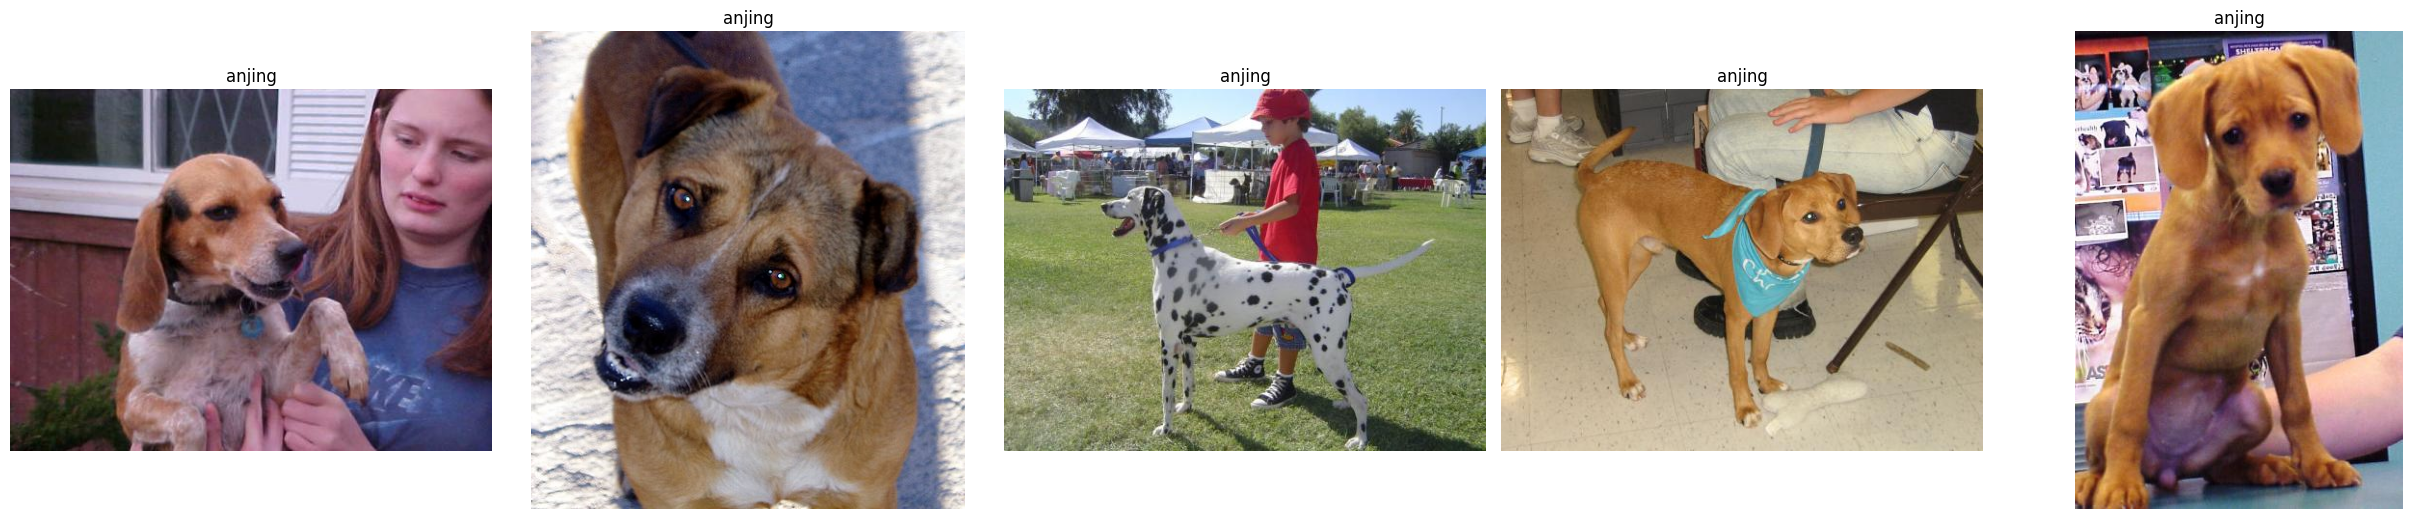

In [12]:
# Fungsi untuk memuat gambar
def load_img(file_path):
    return Image.open(file_path)


# Filter DataFrame untuk 'Anjing' dengan label 0
temp = df[df['label'] == 0]['image_path']

# Pilih indeks awal secara acak
start = random.randint(0, len(temp))

# Pilih 5 gambar dimulai dari indeks acak
files = temp[start:start + 5]

# Membuat figure besar untuk menampilkan grid gambar
plt.figure(figsize=(25, 25))

# Loop melalui gambar dan tampilkan dalam grid 5x5
for index, file in enumerate(files):
    plt.subplot(5, 5, index + 1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title( 'anjing')
    plt.axis('off')

plt.tight_layout()
plt.show()

Data Cleaning

In [13]:
from PIL import Image, UnidentifiedImageError
import os  # Untuk memanipulasi file dan folder

def find_corrupted(folder):
    corrupted_files = []  # List untuk menyimpan nama file yang rusak
    for fname in os.listdir(folder):  # Iterasi setiap file dalam folder
        fpath = os.path.join(folder, fname)  # Gabungkan nama file dengan path folder
        try:
            img = Image.open(fpath)  # Coba buka file gambar
            img.verify()  # Verifikasi apakah gambar valid (bukan rusak)
        except (IOError, UnidentifiedImageError, Exception):  # Tangani error jika file tidak valid
            corrupted_files.append(fpath) # Tambahkan file yang rusak ke list
    return corrupted_files  # Kembalikan list file yang rusak


# Tentukan path folder gambar kucing dan anjing
cats_folder = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/"
dogs_folder = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/"

# Panggil fungsi untuk mencari file yang rusak pada masing-masing folder
corrupted_cats = find_corrupted(cats_folder)
corrupted_dogs = find_corrupted(dogs_folder)

print("File yang rusak pada cats:", corrupted_cats)  # Menampilkan file rusak di folder kucing
print("Jumlah file yang rusak pada cats:", len(corrupted_cats)) # Menampilkan jumlah file rusak di folder kucing

print("File yang rusak pada dogs:", corrupted_dogs)  # Menampilkan file rusak di folder anjing
print("Jumlah file yang rusak pada dogs:", len(corrupted_dogs)) # Menampilkan jumlah file rusak di folder anjing

File yang rusak pada cats: ['/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/Thumbs.db', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/666.jpg']
Jumlah file yang rusak pada cats: 2
File yang rusak pada dogs: ['/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11702.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/Thumbs.db']
Jumlah file yang rusak pada dogs: 2


Train/Test Split **Dataset**

In [14]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

print("Training set size:", len(train_df))
print("Testing set size:", len(test_df))

Training set size: 20001
Testing set size: 5001


In [20]:
# Menghapus file yang rusak dari DataFrame
corrupted_files = corrupted_cats + corrupted_dogs
train_df = train_df[~train_df['image_path'].isin(corrupted_files)]
test_df = test_df[~test_df['image_path'].isin(corrupted_files)]

# Membuat data generator
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisasi piksel
    rotation_range=20, # Rotasi acak
    width_shift_range=0.2, # Geser lebar acak
    height_shift_range=0.2, # Geser tinggi acak
    shear_range=0.2, # Shear transformation acak
    zoom_range=0.2, # Zoom acak
    horizontal_flip=True, # Flip horizontal acak
    fill_mode='nearest' # Mengisi piksel yang hilang
)

# Membuat generator untuk training dan testing
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='raw', # Karena labelnya adalah angka (0 atau 1)
    seed=42
)

test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='raw',
    seed=42
)

Found 19999 validated image filenames.
Found 4999 validated image filenames.


Membuat Model

In [21]:
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128, 128, 3], kernel_initializer= 'he_normal'))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', kernel_initializer= 'he_normal'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', kernel_initializer= 'he_normal'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', kernel_initializer= 'he_normal'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer= 'he_normal'))
cnn.add(tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer= 'he_normal'))
cnn.add(tf.keras.layers.Dense(units=32, activation='relu', kernel_initializer= 'he_normal'))
cnn.add(tf.keras.layers.Dense(units=16, activation='relu', kernel_initializer= 'he_normal'))
cnn.add(tf.keras.layers.Dense(units=8, activation='relu', kernel_initializer= 'he_normal'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_initializer= 'he_normal'))

1. **Input**: Gambar 128x128x3 (RGB) biar model bisa ngerjain gambar yang cukup jelas tapi nggak terlalu berat.

2. **Convolutional Layers**:
   - Lapisan konvolusi pertama pakai **32 filter** dengan **kernel 3x3** dan **ReLU** buat ngambil fitur penting seperti tepi dan tekstur.
   - Lapisan konvolusi selanjutnya pakai **64, 128, 256 filter** secara bertahap untuk ekstraksi fitur yang lebih kompleks.

3. **MaxPooling**:
   - Max pooling dipake setelah tiap lapisan konvolusi buat ngecilin ukuran gambar (feature map) dan ngurangin komputasi. Juga bantu supaya nggak overfit.

4. **Flatten**:
   - Setelah feature map diproses di lapisan konvolusi dan pooling, kita **flatten** (ubah ke vektor 1D) supaya bisa diproses oleh lapisan dense.

5. **Dense Layers**:
   - **128 neuron**: Ini cukup untuk belajar pola yang agak rumit tapi nggak berisiko overfitting. Jumlah neuron yang lebih kecil ini cocok buat model yang lebih ringan dan cepat.
   - **64, 32, 16, 8 neuron**: Lapisan dense dengan jumlah neuron berkurang bertahap untuk memadatkan fitur sebelum output.

6. **Output**:
   - Di lapisan output, pakai **sigmoid** buat klasifikasi biner (misalnya, gambar kucing atau anjing). Sigmoid ngasih output 0 atau 1.


In [22]:
# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,579,201 (6.02 MB)

 Trainable params: 1,579,201 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=7, restore_best_weights=True)

history = cnn.fit(
    train_generator,
    validation_data=test_generator,
    steps_per_epoch=150,
    epochs=50,
    callbacks=[early_stop]
)

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 117s 378ms/step - accuracy: 0.5204 - loss: 0.7104 - val_accuracy: 0.5507 - val_loss: 0.6835
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 57s 382ms/step - accuracy: 0.5368 - loss: 0.6886 - val_accuracy: 0.5299 - val_loss: 0.6721
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 63s 423ms/step - accuracy: 0.5781 - loss: 0.6701 - val_accuracy: 0.5843 - val_loss: 0.6693
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 55s 371ms/step - accuracy: 0.5931 - loss: 0.6540 - val_accuracy: 0.6445 - val_loss: 0.6429
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 29s 194ms/step - accuracy: 0.6176 - loss: 0.6328 - val_accuracy: 0.6415 - val_loss: 0.6322
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 114s 369ms/step - accuracy: 0.6313 - loss: 0.6354 - val_accuracy: 0.6931 - val_loss: 0.5991
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 55s 369ms/step - accuracy: 0.6781 - loss: 0.6032 - val_accuracy: 0.7157 - val_loss: 0.5606
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 56s 376ms/step - accuracy: 0.7002 - loss:

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluasi model pada set pengujian (akurasi ini didasarkan pada alur evaluasi, yang mungkin sedikit berbeda)
loss, accuracy = cnn.evaluate(test_generator)

print(f"Test Loss (from evaluate): {loss:.4f}")
print(f"Test Accuracy (from evaluate): {accuracy:.4f}")

# Dapatkan prediksi dan label asli dalam urutan yang benar dengan melakukan iterasi melalui generator
y_true = []
y_pred_prob = []

test_generator.reset() # Reset generator untuk memastikan urutan yang konsisten
for _ in range(len(test_generator)):
    images, labels = next(test_generator)
    y_true.extend(labels)
    y_pred_prob.extend(cnn.predict(images))

y_true = np.array(y_true)
y_pred_prob = np.array(y_pred_prob)
y_pred = (y_pred_prob > 0.5).astype(int)


# Hitung dan cetak classification report (termasuk F1 score)
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Hitung dan cetak confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 172ms/step - accuracy: 0.8877 - loss: 0.2634
Test Loss (from evaluate): 0.2652
Test Accuracy (from evaluate): 0.8882
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━

### **pre-trained model : MobileNet**

In [25]:
from tensorflow.keras.applications import MobileNetV2

# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet',
                         include_top=False,
                         input_shape=(128, 128, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

base_model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_128"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

#### Build new model



In [26]:
from tensorflow.keras.layers import Flatten, Dense

# Create a new sequential model
model = tf.keras.models.Sequential()

# Add the base model
model.add(base_model)

# Add a Flatten layer
model.add(Flatten())

# Add a hidden Dense layer
model.add(Dense(units=128, activation='relu'))

# Add the output Dense layer
model.add(Dense(units=1, activation='sigmoid'))

# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 20480)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     2,621,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,879,681 (18.61 MB)

 Trainable params: 2,621,697 (10.00 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

#### Compile model

Kompilasi model baru dengan optimizer dan fungsi loss yang sesuai (binary crossentropy untuk 2 kelas).


In [27]:
# Compile the new model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 20480)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     2,621,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,879,681 (18.61 MB)

 Trainable params: 2,621,697 (10.00 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

#### *italicized text* Train model

Latih model menggunakan `train_generator` dan validasi dengan `test_generator` yang sudah ada.


In [28]:
from tensorflow.keras.callbacks import EarlyStopping

# Create an EarlyStopping callback
early_stop = EarlyStopping(patience=2, restore_best_weights=True)

# Calculate steps per epoch
steps_per_epoch = len(train_df) //

# Train the model
history_transfer = model.fit(
    train_generator,
    validation_data=test_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    callbacks=[early_stop]
)

Epoch 1/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 186s 273ms/step - accuracy: 0.9106 - loss: 0.3209 - val_accuracy: 0.9404 - val_loss: 0.1439
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.9375 - loss: 0.1389 - val_accuracy: 0.9448 - val_loss: 0.1352
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 206s 248ms/step - accuracy: 0.9472 - loss: 0.1337 - val_accuracy: 0.9504 - val_loss: 0.1239
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.9688 - loss: 0.0791 - val_accuracy: 0.9490 - val_loss: 0.1333
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 155s 248ms/step - accuracy: 0.9512 - loss: 0.1213 - val_accuracy: 0.9478 - val_loss: 0.1269


#### Evaluasi

In [29]:
# --- Evaluate Fine-tuned Pre-trained Model ---
print("\nEvaluating Fine-tuned Pre-trained Model...")
loss_transfer, accuracy_transfer = model.evaluate(test_generator)

print(f"Fine-tuned Model Test Loss (from evaluate): {loss_transfer:.4f}")
print(f"Fine-tuned Model Test Accuracy (from evaluate): {accuracy_transfer:.4f}")

# Get predictions for fine-tuned pre-trained model
test_generator.reset() # Reset generator for the second model
y_true_transfer = []
y_pred_prob_transfer = []

for _ in range(len(test_generator)):
    images, labels = next(test_generator)
    y_true_transfer.extend(labels)
    y_pred_prob_transfer.extend(model.predict(images))

y_true_transfer = np.array(y_true_transfer)
y_pred_prob_transfer = np.array(y_pred_prob_transfer)
y_pred_transfer = (y_pred_prob_transfer > 0.5).astype(int)

# Calculate and print classification report for fine-tuned pre-trained model
print("\nFine-tuned Model Classification Report:")
print(classification_report(y_true_transfer, y_pred_transfer))

# Calculate and print confusion matrix for fine-tuned pre-trained model
print("\nFine-tuned Model Confusion Matrix:")
print(confusion_matrix(y_true_transfer, y_pred_transfer))


Evaluating Fine-tuned Pre-trained Model...
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 185ms/step - accuracy: 0.9478 - loss: 0.1278
Fine-tuned Model Test Loss (from evaluate): 0.1235
Fine-tuned Model Test Accuracy (from evaluate): 0.9498
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━

Save Best model

In [32]:
# Save the best model to an .h5 file
model.save('best_model_MobileNet_catsvsdogs.h5')
print("Model saved successfully!")

Model saved successfully!


Donload model

In [33]:
from google.colab import files

files.download('best_model_MobileNet_catsvsdogs.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Food-101**

Download Dataset

In [36]:
# Download latest version
path = kagglehub.dataset_download("dansbecker/food-101")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/food-101


extract Dataset

In [37]:
# Helper function to download data and extract
def get_data_extract():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    print("Downloading the data...")
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    print("Dataset downloaded!")
    print("Extracting data..")
    !tar xzvf food-101.tar.gz
    print("Extraction done!")

SyntaxError: invalid syntax (ipython-input-2706598091.py, line 8)

### Read Dataset

Menampilkan file classes yang saya akan tampilkan adalah 20 data awal, dari sekian banyak nya data

In [38]:
classes = open("/kaggle/input/food-101/food-101/food-101/meta/classes.txt", 'r').read().splitlines() # 'r' = read
classes_21 = classes[:20] + ['other']
classes_21, len(classes_21)

(['apple_pie',
  'baby_back_ribs',
  'baklava',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito',
  'bruschetta',
  'caesar_salad',
  'cannoli',
  'caprese_salad',
  'carrot_cake',
  'ceviche',
  'cheesecake',
  'cheese_plate',
  'chicken_curry',
  'chicken_quesadilla',
  'other'],
 21)

Menampilakan data testing gambar dari 5 teratas

In [39]:
print("Testing Images")
!head -n 5 /kaggle/input/food-101/food-101/food-101/meta/test.txt

Testing Images
apple_pie/1011328
apple_pie/101251
apple_pie/1034399
apple_pie/103801
apple_pie/1038694


Menampilakan data training gambar dari 5 teratas

In [40]:
print("Training Images")
!head -n 5 /kaggle/input/food-101/food-101/food-101/meta/train.txt

Training Images
apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283


### Membuat sebuah DataFrame dari file teks yang berisi nama-nama gambar dengan format path relatif.

In [41]:
import pandas as pd
from sklearn.utils import shuffle

def prep_df(path: str) -> pd.DataFrame:
    # Membaca file dan mendapatkan nama gambar dalam list
    with open(path, 'r') as file:
        array = file.read().splitlines()

    # Menentukan path untuk gambar (menggunakan jalur absolut yang benar)
    img_path = "/kaggle/input/food-101/food-101/food-101/images/"

    # Membuat list untuk path lengkap gambar
    full_path = []
    labels = []
    images = []

    for img in array:
        # Memisahkan nama label dan gambar
        label, image = img.split('/')
        labels.append(label)
        images.append(image)
        full_path.append(img_path + img + ".jpg")

    # Membuat DataFrame dengan dua kolom: label dan path gambar
    imgs_df = pd.DataFrame({
        'label': labels,
        'path': full_path
    })

    # Mengacak urutan data
    imgs_df = shuffle(imgs_df)

    return imgs_df

Melihat hasil pembuatan Dataframe

In [42]:
train_imgs = prep_df('/kaggle/input/food-101/food-101/food-101/meta/train.txt')
test_imgs = prep_df('/kaggle/input/food-101/food-101/food-101/meta/test.txt')

train_imgs.head(5)

label                                               path
71368          sushi  /kaggle/input/food-101/food-101/food-101/image...
56646            pho  /kaggle/input/food-101/food-101/food-101/image...
73266       takoyaki  /kaggle/input/food-101/food-101/food-101/image...
18985  club_sandwich  /kaggle/input/food-101/food-101/food-101/image...
69786          steak  /kaggle/input/food-101/food-101/food-101/image...

### Visualiasasi secara acak dengan total jumlah gambar 24

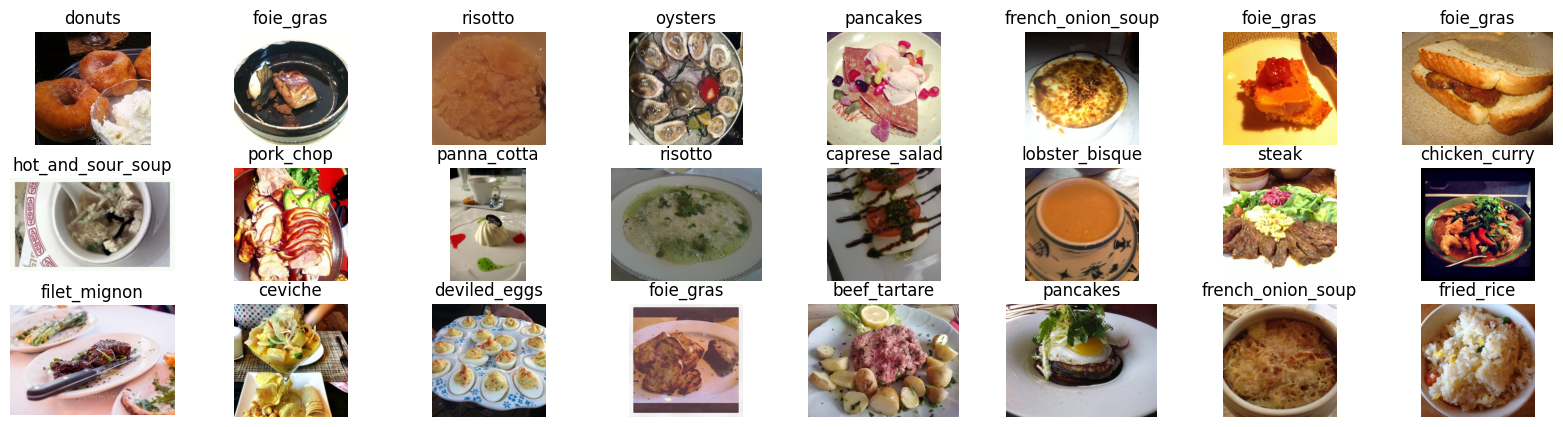

In [43]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 5))

# Menentukan jumlah baris dan kolom untuk grid
num_rows = 3
num_cols = 8

# Loop untuk menampilkan gambar secara acak
for index in range(num_rows * num_cols):
    # Mengambil indeks acak dari dataset
    random_image_idx = np.random.randint(0, train_imgs.shape[0])

    # Membaca gambar berdasarkan path yang dipilih secara acak
    image = plt.imread(train_imgs.path.iloc[random_image_idx])

    # Mengambil label gambar
    image_label = train_imgs.label.iloc[random_image_idx]

    # Menambahkan subplot untuk setiap gambar
    ax = plt.subplot(num_rows, num_cols, index + 1)

    # Menampilkan gambar
    plt.imshow(image)

    # Menambahkan judul dengan label gambar
    plt.title(image_label)

    # Menyembunyikan axis (garis sumbu)
    plt.axis("off")


### Membuat folder yang terdiri dari file txt dan gambar

In [44]:
# Import library yang diperlukan
from collections import defaultdict  # Untuk membuat dictionary dengan default list
from shutil import copy  # Untuk menyalin file
import os  # Untuk berinteraksi dengan sistem operasi

# Fungsi untuk mempersiapkan data (menyalin gambar ke folder berdasarkan kategori)
def prepare_data(filepath, src, dest):

    # Membuat dictionary dengan default list untuk menyimpan gambar per kategori
    classes_images = defaultdict(list)

    # Membaca file teks yang berisi path gambar
    with open(filepath, 'r') as txt:
        # Membaca setiap baris dalam file dan menghilangkan spasi kosong
        paths = [read.strip() for read in txt.readlines()]

        # Memproses setiap path gambar
        for p in paths:
            # Memisahkan path berdasarkan '/' untuk mendapatkan kategori dan nama gambar
            food = p.split('/')

            # Menambahkan nama gambar (dengan ekstensi .jpg) ke dalam kategori yang sesuai
            classes_images[food[0]].append(food[1] + '.jpg')

    # Untuk setiap kategori makanan yang ada di dictionary
    for food in classes_images.keys():
        # Menampilkan pesan bahwa gambar akan disalin ke folder kategori tersebut
        print("\nMenyalin gambar ke ", food)

        # Mengecek apakah folder kategori tersebut sudah ada di folder tujuan
        if not os.path.exists(os.path.join(dest, food)):
            # Jika folder belum ada, maka buat folder baru
            os.makedirs(os.path.join(dest, food))

        # Untuk setiap gambar dalam kategori tersebut
        for i in classes_images[food]:
            # Menyalin gambar dari folder sumber ke folder tujuan
            copy(os.path.join(src, food, i), os.path.join(dest, food, i))

    # Menampilkan pesan bahwa proses penyalinan selesai
    print("Salinan Selesai!")


Bertujuan untuk mempersiapkan dataset dengan menyalin gambar-gambar ke dalam folder-folder yang sesuai dengan kategori masing-masing, yang sangat berguna untuk keperluan pelatihan model deep learning, seperti klasifikasi gambar.

Proses Membuat folder train

In [45]:
%cd / # Mengubah direktori kerja ke root
print("Creating train data...")
prepare_data('/kaggle/input/food-101/food-101/food-101/meta/train.txt', '/kaggle/input/food-101/food-101/food-101/images', 'train')

[Errno 2] No such file or directory: '/ # Mengubah direktori kerja ke root'
/content
Creating train data...

Menyalin gambar ke  apple_pie

Menyalin gambar ke  baby_back_ribs

Menyalin gambar ke  baklava

Menyalin gambar ke  beef_carpaccio

Menyalin gambar ke  beef_tartare

Menyalin gambar ke  beet_salad

Menyalin gambar ke  beignets

Menyalin gambar ke  bibimbap

Menyalin gambar ke  bread_pudding

Menyalin gambar ke  breakfast_burrito

Menyalin gambar ke  bruschetta

Menyalin gambar ke  caesar_salad

Menyalin gambar ke  cannoli

Menyalin gambar ke  caprese_salad

Menyalin gambar ke  carrot_cake

Menyalin gambar ke  ceviche

Menyalin gambar ke  cheesecake

Menyalin gambar ke  cheese_plate

Menyalin gambar ke  chicken_curry

Menyalin gambar ke  chicken_quesadilla

Menyalin gambar ke  chicken_wings

Menyalin gambar ke  chocolate_cake

Menyalin gambar ke  chocolate_mousse

Menyalin gambar ke  churros

Menyalin gambar ke  clam_chowder

Menyalin gambar ke  club_sandwich

Menyalin gambar ke 

Proses Membuat folder test

In [46]:
print("Creating test data...")
prepare_data('/kaggle/input/food-101/food-101/food-101/meta/test.txt', '/kaggle/input/food-101/food-101/food-101/images', 'test')

Creating test data...

Menyalin gambar ke  apple_pie

Menyalin gambar ke  baby_back_ribs

Menyalin gambar ke  baklava

Menyalin gambar ke  beef_carpaccio

Menyalin gambar ke  beef_tartare

Menyalin gambar ke  beet_salad

Menyalin gambar ke  beignets

Menyalin gambar ke  bibimbap

Menyalin gambar ke  bread_pudding

Menyalin gambar ke  breakfast_burrito

Menyalin gambar ke  bruschetta

Menyalin gambar ke  caesar_salad

Menyalin gambar ke  cannoli

Menyalin gambar ke  caprese_salad

Menyalin gambar ke  carrot_cake

Menyalin gambar ke  ceviche

Menyalin gambar ke  cheesecake

Menyalin gambar ke  cheese_plate

Menyalin gambar ke  chicken_curry

Menyalin gambar ke  chicken_quesadilla

Menyalin gambar ke  chicken_wings

Menyalin gambar ke  chocolate_cake

Menyalin gambar ke  chocolate_mousse

Menyalin gambar ke  churros

Menyalin gambar ke  clam_chowder

Menyalin gambar ke  club_sandwich

Menyalin gambar ke  crab_cakes

Menyalin gambar ke  creme_brulee

Menyalin gambar ke  croque_madame

Meny

In [ ]:
# Memeriksa ada berapa file yang ada di folder train
print("Total sampel dari file Train : ")
!find train -type d -or -type f -printf '.' | wc -c

# Memeriksa ada berapa file yang ada di folder test
print("Total sampel dari file Test :")
!find test -type d -or -type f -printf '.' | wc -c

Total sampel dari file Train : 
75750


In [48]:
# Memeriksa ada berapa file yang ada di folder test
print("Total sampel dari file Test :")
!find test -type d -or -type f -printf '.' | wc -c

Total sampel dari file Test :
25250


In [49]:
foods_sorted = sorted(classes)
print(foods_sorted)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

In [50]:
# Helper method to create train_mini and test_mini data samples
from collections import defaultdict
from shutil import copytree, rmtree
import os

def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Menalin gambar ke ",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))

In [ ]:
# Membuat sample pengujian sebesar 20%
food_list = ['sushi',
             'steak',
             'chicken_curry',
             'spaghetti_carbonara',
             'macarons',
             'scallops',
             'tuna_tartare',
             'tacos',
             'onion_rings',
             'lobster_bisque',
             'panna_cotta',
             'miso_soup',
             'fried_rice',
             'edamame',
             'fried_calamari',
             'bibimbap',
             'sashimi',
             'tiramisu',
             'gyoza',
             'beef_carpaccio'
             ]
src_train = 'train'
dest_train = 'train_mini'
src_test = 'test'
dest_test = 'test_mini'
# Membuat folder train_mini dengan kelas baru 
print("Creating train data folder with new classes")
dataset_mini(food_list, src_train, dest_train)

In [ ]:
print("Creating train data folder with new classes")
dataset_mini(food_list, src_train, dest_train)

print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating train data folder with new classes
Menalin gambar ke  sushi
Menalin gambar ke  steak
Menalin gambar ke  chicken_curry
Menalin gambar ke  spaghetti_carbonara
Menalin gambar ke  macarons
Menalin gambar ke  scallops
Menalin gambar ke  tuna_tartare
Menalin gambar ke  tacos
Menalin gambar ke  onion_rings
Menalin gambar ke  lobster_bisque
Menalin gambar ke  panna_cotta
Menalin gambar ke  miso_soup
Menalin gambar ke  fried_rice
Menalin gambar ke  edamame
Menalin gambar ke  fried_calamari
Menalin gambar ke  bibimbap
Menalin gambar ke  sashimi
Menalin gambar ke  tiramisu
Menalin gambar ke  gyoza
Menalin gambar ke  beef_carpaccio


In [ ]:
print("Total number of samples in train folder")
!find train_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
15000


In [ ]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)



Creating test data folder with new classes
Menalin gambar ke  sushi
Menalin gambar ke  steak
Menalin gambar ke  chicken_curry
Menalin gambar ke  spaghetti_carbonara
Menalin gambar ke  macarons
Menalin gambar ke  scallops
Menalin gambar ke  tuna_tartare
Menalin gambar ke  tacos
Menalin gambar ke  onion_rings
Menalin gambar ke  lobster_bisque
Menalin gambar ke  panna_cotta
Menalin gambar ke  miso_soup
Menalin gambar ke  fried_rice
Menalin gambar ke  edamame
Menalin gambar ke  fried_calamari
Menalin gambar ke  bibimbap
Menalin gambar ke  sashimi
Menalin gambar ke  tiramisu
Menalin gambar ke  gyoza
Menalin gambar ke  beef_carpaccio


In [55]:
print("Total number of samples in test folder")
!find test_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
5000


In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K

K.clear_session()
n_classes = 20
img_width, img_height = 299, 299
train_data_dir = 'train_mini'
validation_data_dir = 'test_mini'
nb_train_samples = 15000 #75750
nb_validation_samples = 5000 #25250
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 15000 images belonging to 20 classes.
Found 5000 images belonging to 20 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Activation

# Membuat model custom CNN
model = Sequential()
# Lapisan Convolutional 1
model.add(Conv2D(32, (3, 3), activation=None, input_shape=(img_height, img_width, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Lapisan Convolutional 2
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Max Pooling 1
model.add(MaxPooling2D(pool_size=(2, 2)))
# Lapisan Convolutional 3
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Lapisan Convolutional 4
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Max Pooling 2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Lapisan Convolutional 5
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Lapisan Convolutional 6
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Max Pooling 3
model.add(MaxPooling2D(pool_size=(2, 2)))
# Lapisan Convolutional 7
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Lapisan Convolutional 8
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Max Pooling 4
model.add(MaxPooling2D(pool_size=(2, 2)))
# Global Average Pooling
model.add(GlobalAveragePooling2D())
# Fully Connected Layer 1
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Dropout (optional, jika diperlukan)
model.add(Dropout(0.5))

# Lapisan output dengan softmax untuk klasifikasi multikelas
model.add(Dense(20, activation='softmax'))  # 20 kelas

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Cek ringkasan model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 297, 297, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 297, 297, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 297, 297, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 297, 297, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 297, 297, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 297, 297, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 148, 148, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 148, 148, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 148, 148, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 148, 148, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 74, 74, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 74, 74, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 74, 74, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 74, 74, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 74, 74, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 74, 74, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 37, 37, 256)    │       295,16

 Total params: 1,463,860 (5.58 MB)

 Trainable params: 1,459,892 (5.57 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=7,        
    restore_best_weights=True 
)

history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=50,
    validation_data=test_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[early_stopping] # Add the Early Stopping callback
)

In [59]:
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=50,
    validation_data=test_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[early_stopping] # Add the Early Stopping callback
)

Epoch 1/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 394s 394ms/step - accuracy: 0.1188 - loss: 3.2593 - val_accuracy: 0.1182 - val_loss: 5.0845
Epoch 2/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.3125 - loss: 2.2384 - val_accuracy: 0.1192 - val_loss: 5.1754
Epoch 3/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 382s 408ms/step - accuracy: 0.2062 - loss: 2.7333 - val_accuracy: 0.3009 - val_loss: 2.2498
Epoch 4/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.1875 - loss: 2.6900 - val_accuracy: 0.3001 - val_loss: 2.2431
Epoch 5/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 403s 383ms/step - accuracy: 0.2707 - loss: 2.4163 - val_accuracy: 0.3209 - val_loss: 2.2437
Epoch 6/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.3125 - loss: 2.0286 - val_accuracy: 0.3191 - val_loss: 2.2566
Epoch 7/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 354s 378ms/step - accuracy: 0.3195 - loss: 2.2207 - val_accuracy: 0.3297 - val_loss: 2.2915
Epoch 8/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.2500 - loss: 2

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluasi model pada set pengujian (akurasi ini didasarkan pada alur evaluasi, yang mungkin sedikit berbeda)
loss, accuracy = model.evaluate(test_generator)

print(f"Test Loss (from evaluate): {loss:.4f}")
print(f"Test Accuracy (from evaluate): {accuracy:.4f}")

# Dapatkan prediksi dan label asli dalam urutan yang benar dengan melakukan iterasi melalui generator
y_true = []
y_pred_prob = []

test_generator.reset() # Reset generator untuk memastikan urutan yang konsisten
for _ in range(len(test_generator)):
    images, labels = next(test_generator)
    y_true.extend(labels)
    y_pred_prob.extend(model.predict(images))

y_true = np.array(y_true)
y_pred_prob = np.array(y_pred_prob)
y_pred = (y_pred_prob > 0.5).astype(int)

# Hitung dan cetak classification report (termasuk F1 score)
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.2983 - loss: 2.2318
Test Loss (from evaluate): 2.2422
Test Accuracy (from evaluate): 0.3002
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 996ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━

### **pre-trained model : inceptopnv3**

In [61]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the InceptionV3 model with pre-trained weights from ImageNet
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom layers for our classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(n_classes, activation='softmax')(x)

# Create the final model
model_inceptionv3 = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_inceptionv3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_inceptionv3.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 149, 149,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation_9[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_10       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 147, 147,  │     18,432 │ activation_10[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_11       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 73, 73,    │          0 │ activation_11[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 73, 73,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_12       │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 71, 71,    │    138,240 │ activation_12[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_13       │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 23,921,460 (91.25 MB)

 Trainable params: 2,118,676 (8.08 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity.
)

# Train the model with Early Stopping
history_inceptionv3 = model_inceptionv3.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=30,
    validation_data=test_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[early_stopping] # Add the Early Stopping callback
)

Epoch 1/30
937/937 ━━━━━━━━━━━━━━━━━━━━ 367s 373ms/step - accuracy: 0.6058 - loss: 1.3863 - val_accuracy: 0.7634 - val_loss: 0.7335
Epoch 2/30
937/937 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.6875 - loss: 0.7233 - val_accuracy: 0.7640 - val_loss: 0.7224
Epoch 3/30
937/937 ━━━━━━━━━━━━━━━━━━━━ 381s 403ms/step - accuracy: 0.7546 - loss: 0.7945 - val_accuracy: 0.8055 - val_loss: 0.6145
Epoch 4/30
937/937 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.8125 - loss: 0.5401 - val_accuracy: 0.8015 - val_loss: 0.6305
Epoch 5/30
937/937 ━━━━━━━━━━━━━━━━━━━━ 379s 356ms/step - accuracy: 0.7755 - loss: 0.7105 - val_accuracy: 0.8007 - val_loss: 0.6228
Epoch 6/30
937/937 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.6875 - loss: 0.8888 - val_accuracy: 0.8053 - val_loss: 0.5993
Epoch 7/30
937/937 ━━━━━━━━━━━━━━━━━━━━ 382s 376ms/step - accuracy: 0.7859 - loss: 0.6674 - val_accuracy: 0.8137 - val_loss: 0.5733
Epoch 8/30
937/937 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.6875 - loss: 1

Evaluasi pre-trained model inceptionv3

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluasi model pada set pengujian (akurasi ini didasarkan pada alur evaluasi, yang mungkin sedikit berbeda)
loss, accuracy = model_inceptionv3.evaluate(test_generator)

print(f"Test Loss (from evaluate): {loss:.4f}")
print(f"Test Accuracy (from evaluate): {accuracy:.4f}")

# Dapatkan prediksi dan label asli dalam urutan yang benar dengan melakukan iterasi melalui generator
y_true = []
y_pred_prob = []

test_generator.reset() # Reset generator untuk memastikan urutan yang konsisten
for _ in range(len(test_generator)):
    images, labels = next(test_generator)
    y_true.extend(labels)
    y_pred_prob.extend(model_inceptionv3.predict(images))

y_true = np.array(y_true)
y_pred_prob = np.array(y_pred_prob)
y_pred = (y_pred_prob > 0.5).astype(int)


# Hitung dan cetak classification report (termasuk F1 score)
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.8125 - loss: 0.6036
Test Loss (from evaluate): 0.5732
Test Accuracy (from evaluate): 0.8134
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/s

Save best model

In [64]:
# Save the best model to an .h5 file
model_inceptionv3.save('best_inceptionv3_model_food-101.h5')
print("Model saved successfully!")

Model saved successfully!


Download Best model dengan format .h5

In [65]:
from google.colab import files

files.download('best_inceptionv3_model_food-101.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>